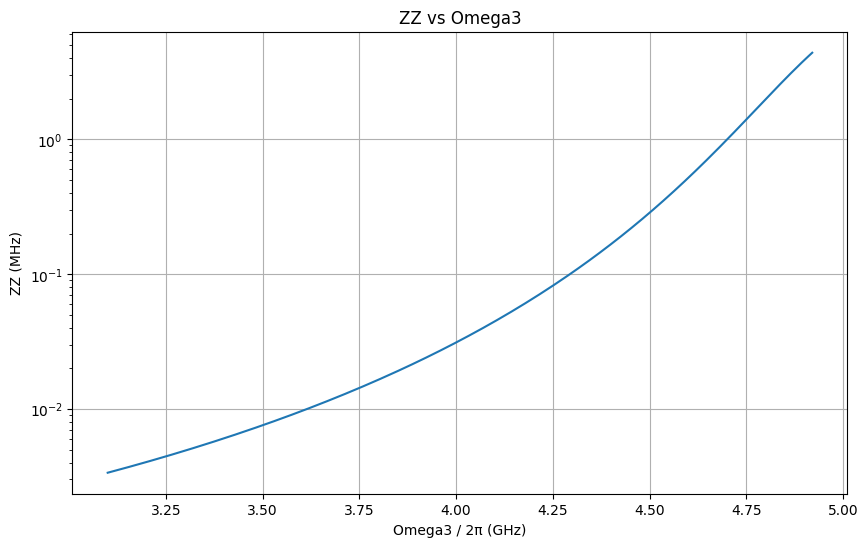

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh

def annihilation(d):
    return np.diag(np.sqrt(np.arange(1, d)), 1)

def creation(d):
    return annihilation(d).T

def calculate_zz(eigenvalues):
    e00 = eigenvalues[0]
    e01 = eigenvalues[1]
    e10 = eigenvalues[d2]
    e11 = eigenvalues[d2+1]
    return (e00 - e01 - e10 + e11)/2/np.pi
def sort_eigenpairs(eigenvalues, eigenvectors):
    n = eigenvectors.shape[0]
    sorted_indices = []

    for i in range(n):
        max_abs_vals = np.abs(eigenvectors[i, :])
        max_index = np.argmax(max_abs_vals)
        while max_index in sorted_indices:
            max_abs_vals[max_index] = -np.inf
            max_index = np.argmax(max_abs_vals)
        sorted_indices.append(max_index)

    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    return sorted_eigenvalues, sorted_eigenvectors
# Parameters
d1 = d2 = d3 = 5
omega1 = 5 * 2 * np.pi
omega2 = 5.09* 2 * np.pi
delta1 = delta2 = 0 * 2 * np.pi
delta3 = -0.14 * 2 * np.pi
g13 = g23 = 0.11 * 2 * np.pi
g12 = -6e-3 * 2 * np.pi

# Create operators
a1, a2, a3 = [annihilation(d) for d in (d1, d2, d3)]
a1d, a2d, a3d = [creation(d) for d in (d1, d2, d3)]
I1, I2, I3 = [np.eye(d) for d in (d1, d2, d3)]

# Sweep range for omega3
omega3_range = np.linspace(3.1 * 2*np.pi, 4.92 * 2 * np.pi, 200)
zz_values = []

for omega3 in omega3_range:
    # Construct Hamiltonians
    H1 = omega1 * a1d @ a1 + delta1/2 * a1d @ a1d @ a1 @ a1
    H2 = omega2 * a2d @ a2 + delta2/2 * a2d @ a2d @ a2 @ a2
    H3 = omega3 * a3d @ a3 + delta3/2 * a3d @ a3d @ a3 @ a3

    H1 = np.kron(I3, np.kron(I2, H1))
    H2 = np.kron(I3, np.kron(H2, I1))
    H3 = np.kron(H3, np.kron(I2, I1))

    # Interaction terms
    Hint12 = g12 * np.kron(I3, np.kron(a2d + a2, a1d + a1))
    Hint23 = g23 * np.kron(a3d + a3, np.kron(a2d + a2, I1))
    Hint13 = g13 * np.kron(a3d + a3, np.kron(I2, a1d + a1))

    # Total Hamiltonian
    H = H1 + H2 + H3 + Hint12 + Hint23 + Hint13

    # Diagonalize
    eigenvalues, _ = eigh(H)

    eigenvalues,_ = sort_eigenpairs(eigenvalues,_)
    # Calculate ZZ
    zz = calculate_zz(eigenvalues)
    zz_values.append(np.abs(zz))

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(np.abs((omega3_range)) / (2 * np.pi), 1e3*np.array(zz_values))
plt.xlabel('Omega3 / 2π (GHz)')
plt.ylabel('ZZ (MHz)')
plt.yscale('log')
plt.title('ZZ vs Omega3')
plt.grid(True)
plt.show()

In [4]:
omega3_range[np.argmin(zz_values)]/2/np.pi

3.1

In [5]:
# Parameters
def state_index(index,dim):
    m,n,k = index
    M,N,K = dim
    return m*(N*K)+n*K+k
def Hamiltonian(omega3):
    dim = [5,5,5]
    d1 = d2 = d3 = 5
    omega1 = 5.22 * 2 * np.pi
    omega2 = 6.8* 2 * np.pi

    delta1 = delta2 = -0. * 2 * np.pi
    delta3 = -0.1 * 2 * np.pi
    g13 = 0.1 * 2 * np.pi
    g23 = 0.05 * 2 * np.pi

    # Create operators
    a1, a2, a3 = [annihilation(d) for d in (d1, d2, d3)]
    a1d, a2d, a3d = [creation(d) for d in (d1, d2, d3)]
    I1, I2, I3 = [np.eye(d) for d in (d1, d2, d3)]

    # Construct Hamiltonians
    H1 = omega1 * a1d @ a1 + delta1/2 * a1d @ a1d @ a1 @ a1
    H2 = omega2 * a2d @ a2 + delta2/2 * a2d @ a2d @ a2 @ a2
    H3 = omega3 * a3d @ a3 + delta3/2 * a3d @ a3d @ a3 @ a3

    H1 = np.kron(I3, np.kron(I2, H1))
    H2 = np.kron(I3, np.kron(H2, I1))
    H3 = np.kron(H3, np.kron(I2, I1))

    # Interaction terms
    Hint12 = g12 * np.kron(I3, np.kron(a2d + a2, a1d + a1))
    Hint23 = g23 * np.kron(a3d + a3, np.kron(a2d + a2, I1))
    Hint13 = g13 * np.kron(a3d + a3, np.kron(I2, a1d + a1))

    # Total Hamiltonian
    H = H1 + H2 + H3 + Hint12 + Hint23 + Hint13
    
    Hc = np.kron(a3d + a3, np.kron(I2, I1))


    return H, Hc
 

In [6]:
import qutip as qt
def find_optimal_k(A, B, D):
    # Define a large initial minimum difference
    min_diff = float('inf')
    optimal_k = None
    
    # Iterate over a range of possible k values
    # The range can be adjusted based on expected size of k or other insights you have about your problem
    for k in range(-1000, 1000):
        # Calculate the difference for this value of k
        diff = abs(A - (B + k * D))
        
        # If this is the smallest difference we've found so far, update min_diff and optimal_k
        if diff < min_diff:
            min_diff = diff
            optimal_k = k
            
    return optimal_k
# Function to calculate overlap (you might use inner product, fidelity, etc.)
def calculate_overlap(state1, state2):
    return abs((state1.dag() * state2))**2


In [7]:

def calculate_floquet_energies(A, omega, omega3):
    # Define system parameters
    dim = [5, 5, 5]
    H0, Hc = Hamiltonian(omega3)
    index001 = state_index([0,0,1], dim)
    index010 = state_index([0,1,0], dim)
    index011 = state_index([0,1,1], dim)
    
    omega1 = np.diag(H0)[index001]
    omega2 = np.diag(H0)[index010]

    H0 = qt.Qobj(H0)
    Hc = qt.Qobj(Hc)

    T = (2 * np.pi) / omega

    # Define the Hamiltonian
    H = [H0, [Hc, lambda t, args: A * np.cos(args['w'] * t)]]

    # Set up the Floquet solver
    floquet_basis = qt.FloquetBasis(H, T, args={'w': omega})

    # Compute Floquet modes and energies
    f_modes = floquet_basis.mode(0)
    f_energies = floquet_basis.e_quasi

    # Define basis states
    basis_states = [qt.basis(H0.dims[0][0], 0), 
                    qt.basis(H0.dims[0][0], index001),
                    qt.basis(H0.dims[0][0], index010),
                    qt.basis(H0.dims[0][0], index011)]

    # Find Floquet states with maximum overlap
    max_overlap_indices = [-1] * 4
    max_overlaps = [0] * 4
    for f_index, f_state in enumerate(f_modes):
        for b_index, b_state in enumerate(basis_states):
            overlap = calculate_overlap(f_state, b_state)
            if overlap > max_overlaps[b_index]:
                max_overlaps[b_index] = overlap
                max_overlap_indices[b_index] = f_index

    # Calculate energies
    energy000 = f_energies[max_overlap_indices[0]] / (2 * np.pi)

    energy001 = f_energies[max_overlap_indices[1]] / (2 * np.pi)
    k = find_optimal_k(omega1 / (2 * np.pi), energy001, omega / (2 * np.pi))
    energy001 = energy001 + k * omega / (2 * np.pi) - energy000

    energy010 = f_energies[max_overlap_indices[2]] / (2 * np.pi)
    k = find_optimal_k(omega2 / (2 * np.pi), energy010, omega / (2 * np.pi))
    energy010 = energy010 + k * omega / (2 * np.pi) - energy000

    energy011 = f_energies[max_overlap_indices[3]] / (2 * np.pi)
    k = find_optimal_k((omega2 + omega1) / (2 * np.pi), energy011, omega / (2 * np.pi))
    energy011 = energy011 + k * omega / (2 * np.pi) - energy000

    zz = energy011 - energy010 - energy001

    return energy001, energy010, zz

In [8]:
omega3 = 6.15*2*np.pi
dim = [5, 5, 5]
H0, Hc = Hamiltonian(omega3)

In [9]:
eigenvals = np.linalg.eigh(H0)[0]
eigenvals -= eigenvals[0]
(eigenvals/2/np.pi)[0:5]

array([ 0.        ,  5.2083879 ,  6.15580725,  6.8036316 , 10.41676202])

In [10]:

# energy001,energy010,zz = calculate_floquet_energies(A, omegad, omega3)
# epsilon = 1e-6
# energy001_,energy010_ ,_= calculate_floquet_energies(A, omegad, omega3+epsilon)
# der1 = (energy001_ - energy001)/epsilon
# der2 = (energy010_ - energy010)/epsilon

In [11]:
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
def sweep_floquet_energies_derivatives(A, omega3, omega_range):
    der1_values = Parallel(n_jobs=-1)(delayed(calculate_derivatives)(A, omegad, omega3) for omegad in omega_range)
    der1_values, der2_values, omega_vals = zip(*der1_values)
    return omega_vals, der1_values, der2_values

def calculate_derivatives(A, omegad, omega3):
    energy001, energy010, zz = calculate_floquet_energies(A, omegad, omega3)
    epsilon = 1e-6
    energy001_, energy010_, _ = calculate_floquet_energies(A, omegad, omega3 + epsilon)
    der1 = (energy001_ - energy001) / epsilon
    der2 = (energy010_ - energy010) / epsilon
    return der1, der2, omegad / (2 * np.pi)

In [12]:

omega3 = 6.135*2*np.pi
A = 0.02*2*np.pi
omegad = 10
calculate_floquet_energies(A, omegad, omega3)

/Users/yunwei/Desktop/PycharmProjects/qutip/qutip/solver/integrator/scipy_integrator.py:80: SparseEfficiencyWarning: Constructing a DIA matrix with 125 diagonals is inefficient
  state0 = _data.column_stack(state0)


(5.208214973008166, 6.803545870698256, -2.0107298594140843e-05)

In [15]:

omega3 = 6.135*2*np.pi
A = 0.01*2*np.pi
# omegad = np.linspace(3.3846*2*np.pi,3.3848*2*np.pi,50)
omegad = np.linspace(6.145*2*np.pi,6.18*2*np.pi,100)
omega_vals, der1_values, der2_values = sweep_floquet_energies_derivatives(A, omega3, omegad)

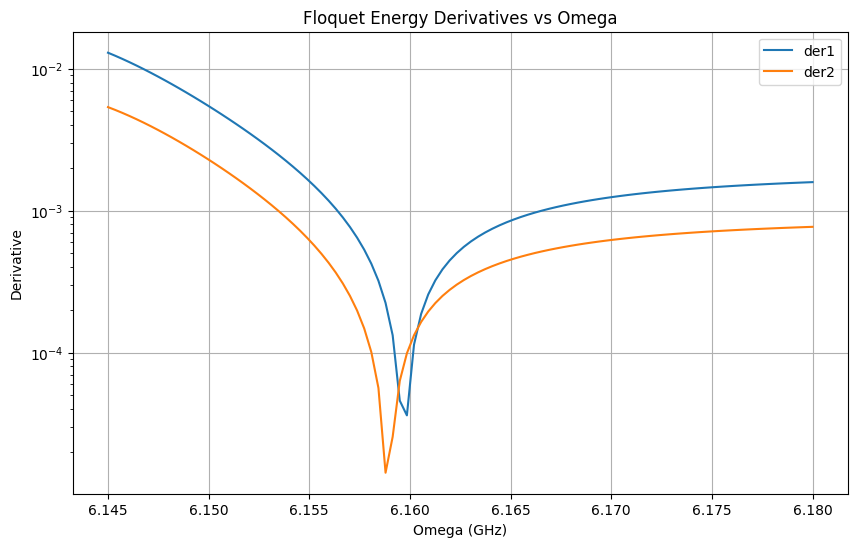

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(omega_vals, np.abs(der1_values), label="der1")
plt.plot(omega_vals, np.abs(der2_values), label="der2")
plt.xlabel("Omega (GHz)")
plt.ylabel("Derivative")
plt.yscale('log')
plt.title("Floquet Energy Derivatives vs Omega")
plt.legend()
plt.grid(True)
plt.show()